# 1 - Business Understanding

Target and Benefits:

The target audience will be the real estate investor that aims to predict the property pricing in a given market. The goal is to produce a more realiable, accurate and data-driven price information to the real estate investor. The benefits for this audience is they can identifying the profitatable oppourtinuties and make strategy decision in holding properties , buying or selling the property. 

Problem Statements:

-   How accurately can we predict property prices using available available data from online ?
-   What are the key variables that significantly influence property prices?
-   Does the type of property affect the pricing ?


Data Sauce Web Scrabbing: https://www.daft.ie/property-for-sale/ireland

# 2 - Data Mining

## Library Import

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder

# 3 - Data Cleaning

Some data cleaning has been done in data Scraping file 1 and 2. For example text.strip() which remove the front and back spaces has been done in the process of web scraping.

## 1) Data Imports

In [ ]:
cwd = os.getcwd()
print(cwd)
filename = "data.csv"
data = pd.read_csv(filename)
data.head()
data.info()

## Data Types and Descriptor

Variables - type - role
1. address                              non-null object - Explanatory (used to predict, but only will be used in the provinces part)
2. price                                non-null int64 - Response (wants to predict)
3. beds                                 non-null int64 - Explanatory (used to predict)
4. baths                                non-null int64 - Explanatory (used to predict)
5. floor_area                           non-null int64 - Explanatory (used to predict)
6. property_type                        non-null object - Explanatory (used to predict)
7. selling_method                       non-null object - Explanatory (used to predict)
8. condition                            non-null object - Ignore (as is the same unique data can't do any of the analysis)
9. date_statistics                      non-null object -Explanatory (used to predict)
10. viewer                              non-null int64 - Explanatory (used to predict)
11. property_features_or_facilities     non-null object - Ignore

In [ ]:
summaryNumerical = data.describe()
print(summaryNumerical)

In [ ]:
print(data["address"].unique())
print(data["baths"].unique())
print(data["beds"].unique())
print(data["condition"].unique())
print(data["price"].unique())
print(data["floor_area"].unique())
print(data["selling_method"].unique())
print(data["date_statistics"].unique())
print(data["property_features_or_facilities"].unique())
print(data["viewer"].unique())

## 3.2 Data Cleaning Process

In [ ]:


data.drop(data[data["selling_method"].isnull()].index, inplace=True)
data.drop(data[data["selling_method"].str.contains("development",case=False,na=False)].index, inplace=True)
data.loc[data["selling_method"].str.contains("treaty", case=False, na=False), "selling_method"] = "Private Treaty"
data.loc[data["selling_method"].str.contains("auction", case=False, na=False), "selling_method"] = "Public Auction"
data.loc[data["selling_method"].str.contains("tender", case=False, na=False), "selling_method"] = "Private Tender"

data = data.drop(data[data.address.isnull()].index)
eircode_pattern = re.compile(r'^[0-9AC-FHKNPRTV-Y]{3,7}$')
data["county"] = data["address"].apply(lambda x: bool(re.search(eircode_pattern, x.split(",")[-1].strip())))
data["county"] = data.apply(lambda x: x["address"].split(",")[-2].strip() if x["county"] == True else x["address"].split(",")[-1].strip(), axis=1)
data.loc[data["county"].str.contains("Dublin", case=False, na=False), "county"] = "Dublin"

data["price"] = data["price"].apply(lambda x: x.replace("€", "").replace(",", "").replace("AMV:","").strip())
data = data[~data["price"].str.contains("price", case=False, na=False)]
data['price'] = data['price'].astype(float)

data.drop(data[data["floor_area"].isnull()].index, inplace=True)
data.floor_area.replace(",","", regex=True, inplace=True)
data["floor_area"] = data.floor_area.apply(lambda x : float(x.split(" ")[0].strip()) * 4046.856 if "ac" in x.split(" ")[1] else x.split(" ")[0].strip())
data["floor_area"] = data["floor_area"].astype(float)

data["beds"].replace(np.nan, "0", inplace=True)
data["beds"] = data["beds"].apply(lambda x: x.replace("Bed", "").strip())
data["beds"] = data["beds"].astype(int)


data["baths"].replace(np.nan, "0", inplace=True)
data["baths"] = data["baths"].apply(lambda x: str(x).replace("Bath", "").strip())
data["baths"] = data["baths"].astype(int)

data.viewer.replace(np.nan, "0", inplace=True)
data["viewer"] = data["viewer"].apply(lambda x: str(x).replace(",", "").strip())
data["viewer"] = data["viewer"].astype(int)

data["day"] = data["date_statistics"].apply(lambda x: x.split("/")[0].strip())
data["month"] = data["date_statistics"].apply(lambda x: x.split("/")[1].strip())
data["year"] = data["date_statistics"].apply(lambda x: x.split("/")[2].strip())
data.drop(["date_statistics"], axis=1, inplace=True)

array = data["property_features_or_facilities"].str.split(",").values

print(data.isnull().sum())
print(data.dtypes)


# 4 - Data Exploration

## 1) Univariate Analysis

### Numericals Analysis

Price

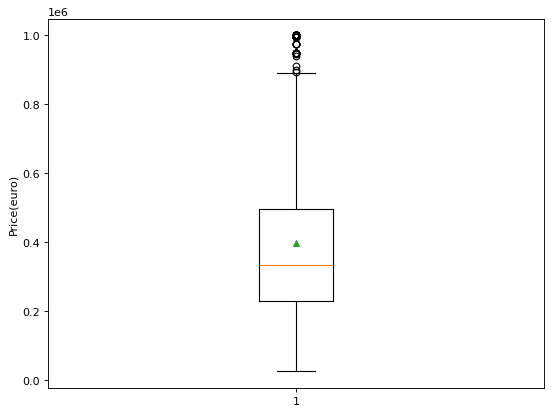

count    1.336000e+03
mean     4.624772e+05
std      6.790114e+05
min      2.500000e+04
25%      2.300000e+05
50%      3.325000e+05
75%      4.950000e+05
max      1.350000e+07
Name: price, dtype: float64

In [7]:
dataPlot = data.price.clip(upper=1000000,lower=0)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x = dataPlot, showmeans=True)
plt.ylabel('Price(euro)')
plt.show()

data.price.describe()


Beds

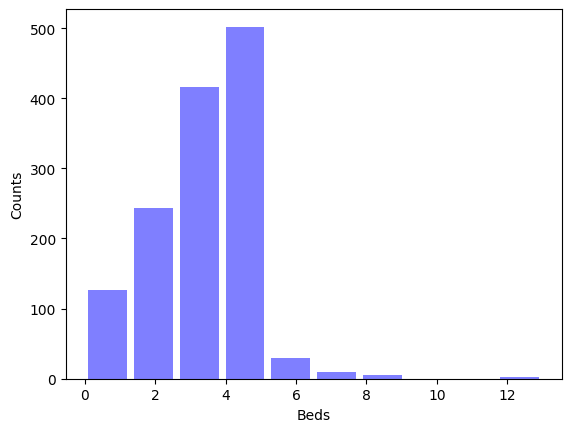

count    1336.000000
mean        2.164671
std         1.307934
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: baths, dtype: float64

In [8]:
plt.hist(x = data.beds, bins=10, color='blue', alpha=0.5, rwidth=0.85)
plt.ylabel('Counts')
plt.xlabel('Beds')
plt.show()
data.baths.describe()

Number of beds that has the highest count is 4

Baths

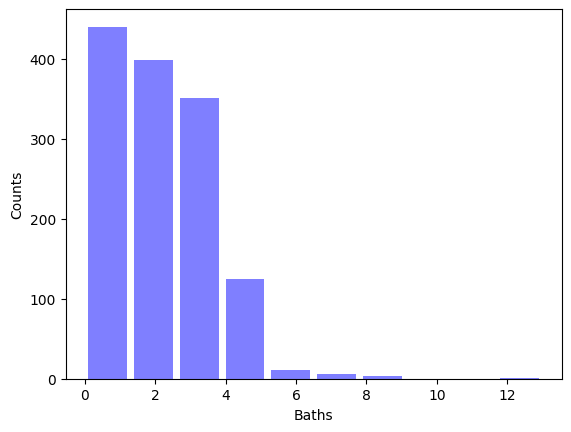

count    1336.000000
mean        2.164671
std         1.307934
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: baths, dtype: float64

In [9]:

plt.hist(x = data.baths, bins=10, color='blue', alpha=0.5, rwidth=0.85)
plt.ylabel('Counts')
plt.xlabel('Baths')
plt.show()
data.baths.describe()

Number of baths that has the highest count is 1.

Floor Area in m2(meter square)

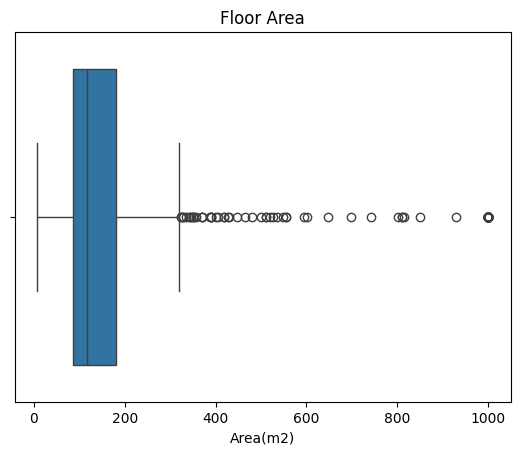

count    1.336000e+03
mean     2.369815e+03
std      6.152374e+04
min      8.000000e+00
25%      8.700000e+01
50%      1.170000e+02
75%      1.812500e+02
max      2.234350e+06
Name: floor_area, dtype: float64

In [10]:
dataplot = data.floor_area.clip(upper=1000,lower=0)
# plt.boxplot(x = dataplot, showmeans=True)
sns.boxplot(x = dataplot)
plt.title('Floor Area')
plt.xlabel('Area(m2)')
plt.show()
data.floor_area.describe()

### Categorical Analysis

Property Type

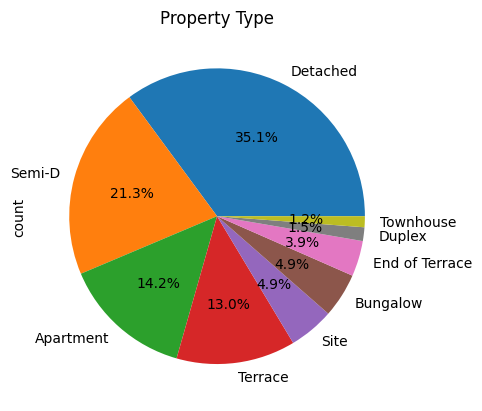

In [11]:
numberPropertyType = data.property_type.value_counts()
numberPropertyType.plot.pie(autopct='%1.1f%%')
plt.title("Property Type")
plt.show()


One third of the property type has been acquired by the detached which has a 35.1% and is the highest percentage.

Selling Method

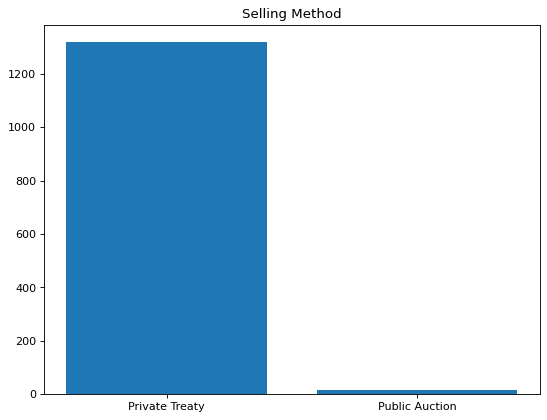

In [12]:
numberSellingMethod = data.selling_method.value_counts()
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(numberSellingMethod.index, numberSellingMethod.values)
plt.title("Selling Method")
plt.show()


Majority of the property is selling through private treaty.

## 3) Bivariate Analysis

Numerical - Numerical

In [13]:
print(data[['price','floor_area','beds','baths','viewer']].corr())

               price  floor_area      beds     baths    viewer
price       1.000000    0.345923  0.391636  0.370400  0.289520
floor_area  0.345923    1.000000 -0.077217 -0.057776 -0.006547
beds        0.391636   -0.077217  1.000000  0.703477  0.239884
baths       0.370400   -0.057776  0.703477  1.000000  0.228596
viewer      0.289520   -0.006547  0.239884  0.228596  1.000000


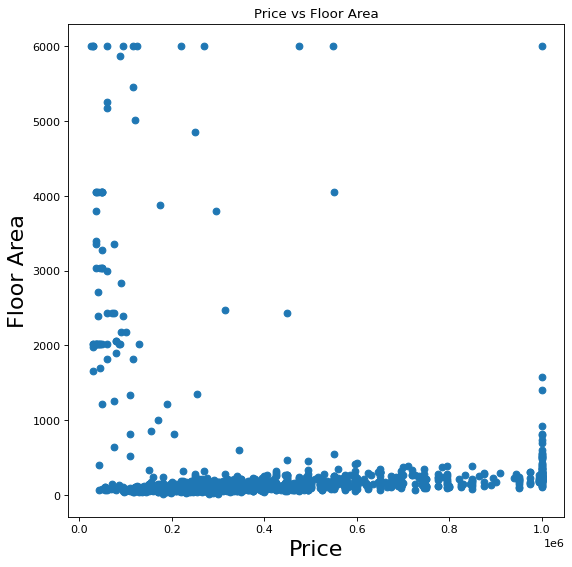

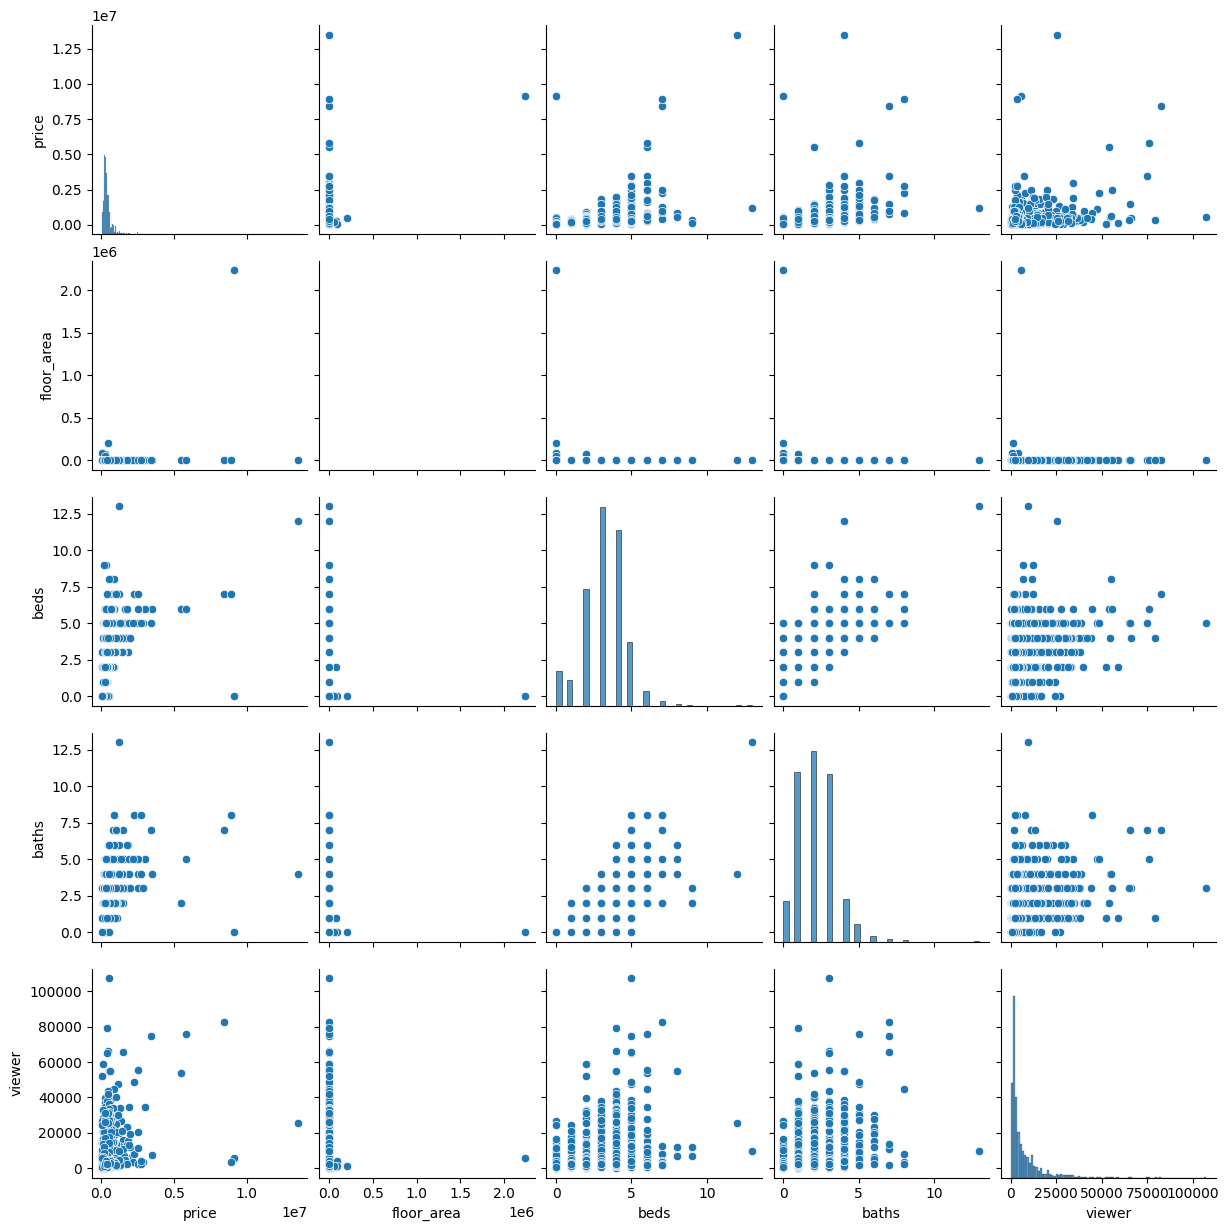

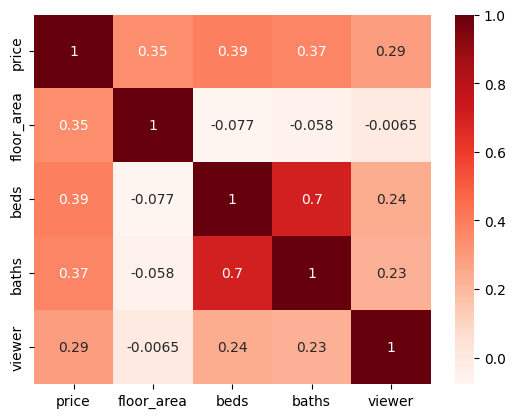

In [14]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
dataPrice = data.price.clip(upper=1000000,lower=0)
dataFloorArea = data.floor_area.clip(upper=6000,lower=0)
plt.scatter(dataPrice,dataFloorArea)
plt.title("Price vs Floor Area")
plt.xlabel("Price", size=20)
plt.ylabel("Floor Area", size=20)
plt.show()


sns.pairplot(data = data, vars=["price", "floor_area", "beds", "baths", "viewer"])
plt.show()

sns.heatmap(data[["price", "floor_area", "beds", "baths", "viewer"]].corr(), annot=True, cmap = 'Reds')
plt.show()



## Numerical - Categorical

### Property Type with price

property_type
Apartment         285399.473684
Bungalow          366746.738462
Detached          632775.904051
Duplex            324150.000000
End of Terrace    325885.980769
Semi-D            429645.598592
Site              226462.121212
Terrace           446208.798851
Townhouse         312368.750000
Name: price, dtype: float64
property_type
Apartment         265000.0
Bungalow          325000.0
Detached          445000.0
Duplex            297500.0
End of Terrace    280000.0
Semi-D            337000.0
Site               60000.0
Terrace           360000.0
Townhouse         299475.0
Name: price, dtype: float64


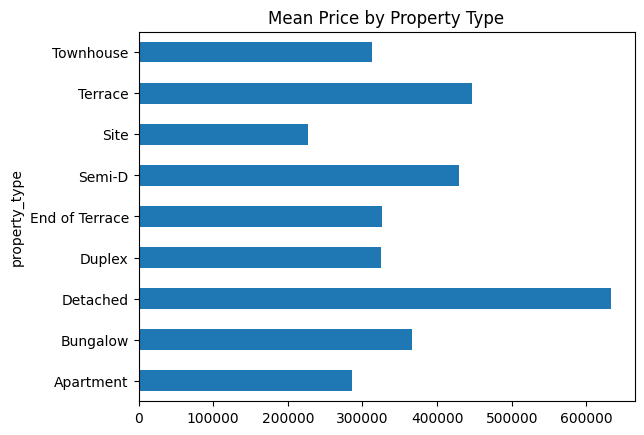

In [15]:

meanPricePropertyType = data.groupby("property_type")["price"].mean()
print(meanPricePropertyType)

medianPricePropertyType = data.groupby("property_type")["price"].median()
print(medianPricePropertyType)

meanPricePropertyType.plot.barh()
plt.title("Mean Price by Property Type")
plt.show()





Detached property type has the highest mea price and following is terrace and semi-D.

### Selling Method - Price

selling_method
Private Treaty    464946.542077
Public Auction    270882.352941
Name: price, dtype: float64
selling_method
Private Treaty    335000.0
Public Auction    195000.0
Name: price, dtype: float64


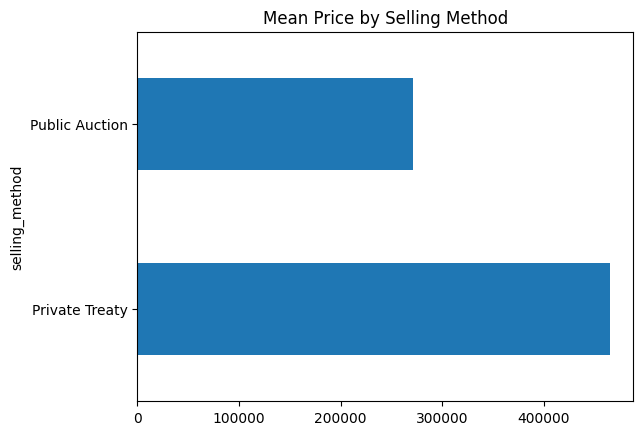

In [16]:
meanPriceSellingMethod = data.groupby("selling_method")["price"].mean()
print(meanPriceSellingMethod)

medianPriceSellingMethod = data.groupby("selling_method")["price"].median()
print(medianPriceSellingMethod)

meanPriceSellingMethod.plot.barh()
plt.title("Mean Price by Selling Method")
plt.show()


Category - Category

selling_method  property_type 
Private Treaty  Detached          461
                Semi-D            282
                Apartment         187
                Terrace           174
                Bungalow           64
                Site               63
                End of Terrace     52
                Duplex             20
                Townhouse          16
Public Auction  Detached            8
                Apartment           3
                Site                3
                Semi-D              2
                Bungalow            1
Name: count, dtype: int64


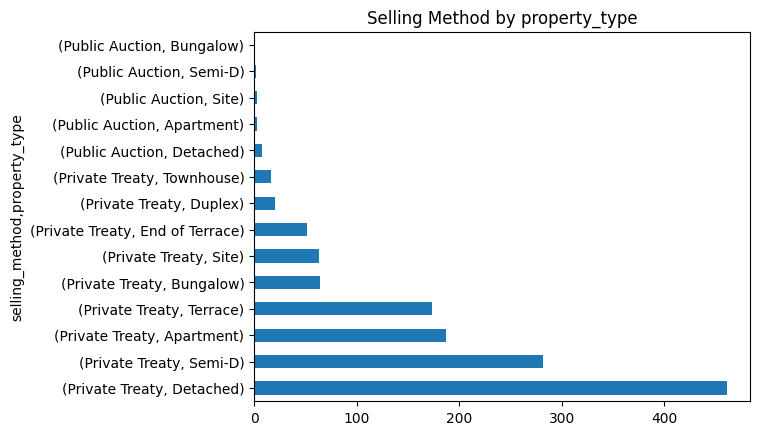

In [17]:


sellingMethodByPropertyType = data.groupby(["selling_method"])["property_type"].value_counts()
print(sellingMethodByPropertyType)

sellingMethodByPropertyType.plot.barh()
plt.title("Selling Method by property_type")
plt.show()

# provinceBySellingMethod = data.groupby(["provinces"])["selling_method"].value_counts()
# print(provinceBySellingMethod)
# provinceBySellingMethod.plot.barh()
# plt.title("Selling Method by County")
# plt.show()


private treaty with detached property has the highest value count comparing to other and the second is priavte treaty and semi-D property.

## 4) Multivariate Analysis

property_type       Apartment      Bungalow       Detached    Duplex  \
selling_method                                                         
Private Treaty  287010.160428  368102.15625  636945.550976  324150.0   
Public Auction  185000.000000  280000.00000  392500.000000       NaN   

property_type   End of Terrace         Semi-D          Site        Terrace  \
selling_method                                                               
Private Treaty   325885.980769  431416.134752  232960.31746  446208.798851   
Public Auction             NaN  180000.000000   90000.00000            NaN   

property_type   Townhouse  
selling_method             
Private Treaty  312368.75  
Public Auction        NaN  


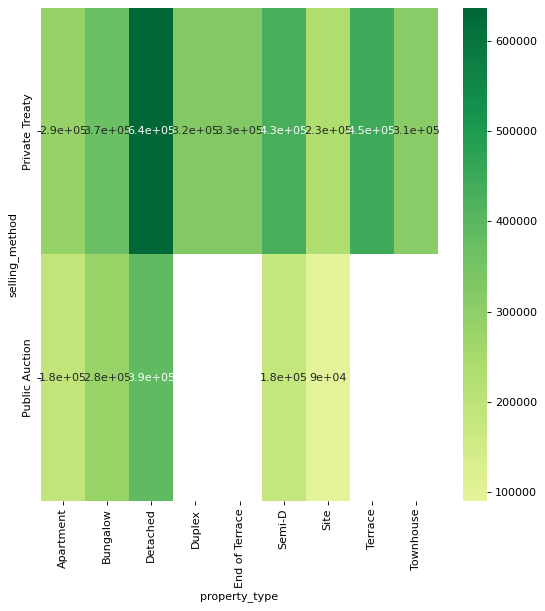

In [18]:
result = pd.pivot_table(data=data, index='selling_method', columns='property_type', values='price')
print(result)

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
# sns.barplot(result, annot=True, cmap='RdYlGn', center=0.117)
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

Detached With te Treaty has the highest price throughout all the data

# 5 - Features Engineering

In [8]:
data["price_rate"] = data["price"] / data["floor_area"]


data["isPrivate"] = data["selling_method"].apply(lambda x: 1 if "Private" in x else 0 )
data["isPrivate"].unique()

county_to_province = {'Co. Cork': 'Munster','Co. Kildare': 'Leinster','Co. Longford': 'Leinster','Co. Galway': 'Connacht','Co. Wicklow': 'Leinster','Co. Tipperary': 'Munster','Co. Mayo': 'Connacht','Dublin': 'Leinster','Co. Roscommon': 'Connacht','Co. Kerry': 'Munster','Co. Cavan': 'Ulster','Co. Meath': 'Leinster','Co. Sligo': 'Connacht','Co. Limerick': 'Munster','Co. Wexford': 'Leinster','Co. Kilkenny': 'Leinster','Co. Waterford': 'Munster','Co. Laois': 'Leinster','Co. Clare': 'Munster','Co. Carlow': 'Leinster','Co. Donegal': 'Ulster','Limerick City Centre': 'Munster','Belmayne': 'Leinster','Co. Monaghan': 'Ulster','Co. Offaly': 'Leinster','Galway City Centre': 'Connacht','Co. Louth': 'Leinster','Co. Leitrim': 'Connacht','Waterford City Centre': 'Munster','Co. Westmeath': 'Leinster','Northern Cross': 'Leinster','Co. Fermanagh': 'Ulster','Kingscourt': 'Ulster','Waterford': 'Munster','Cork City Centre': 'Munster','Kilmacowen': 'Connacht','Ferrybank': 'Munster','Co. Antrim': 'Ulster','Carlow': 'Leinster'}
data["provinces"] = data["county"].map(county_to_province)

data.drop('address', axis = 1, inplace = True)
data.drop('county', axis = 1, inplace = True)
data.drop('property_features_or_facilities', axis = 1, inplace = True)
data.drop('selling_method', axis = 1, inplace = True)
data.drop('condition', axis = 1, inplace = True)
data.drop('day', axis = 1, inplace = True)
data.drop('month', axis = 1, inplace = True)
data.drop('year', axis = 1, inplace = True)

le = LabelEncoder()
data['provinces_encoded'] = le.fit_transform(data['provinces'])
#['Connacht' 'Leinster' 'Munster' 'Ulster']

data['property_type_encoded'] = le.fit_transform(data['property_type'])
# 'Apartment'   0
# 'Bungalow'    1
# 'Detached'    2
# 'Duplex'    3
# 'End of Terrace' 4
# 'Semi-D'      5
#  'Site'     6
# 'Terrace'     7   
# 'Townhouse'       8

data.drop('provinces', axis = 1, inplace = True)
data.drop('property_type', axis = 1, inplace = True)
data

,price,beds,baths,floor_area,viewer,price_rate,isPrivate,provinces_encoded,property_type_encoded
0,235000.0,2,2,82.00000,39596,2865.853659,1,2,8
1,300000.0,2,2,75.00000,6366,4000.000000,1,1,0
2,310000.0,4,3,145.00000,16308,2137.931034,1,1,2
3,450000.0,4,3,271.00000,66125,1660.516605,1,0,2
4,295000.0,3,2,85.00000,16105,3470.588235,1,2,5
...,...,...,...,...,...,...,...,...,...
2015,150000.0,2,2,66.00000,1159,2272.727273,1,3,0
2016,595000.0,3,2,112.00000,2963,5312.500000,1,1,7
2017,295000.0,5,2,3804.04464,4211,77.549037,1,1,2
2018,275000.0,2,2,62.00000,2457,4435.483871,1,1,0


<Figure size 640x480 with 0 Axes>

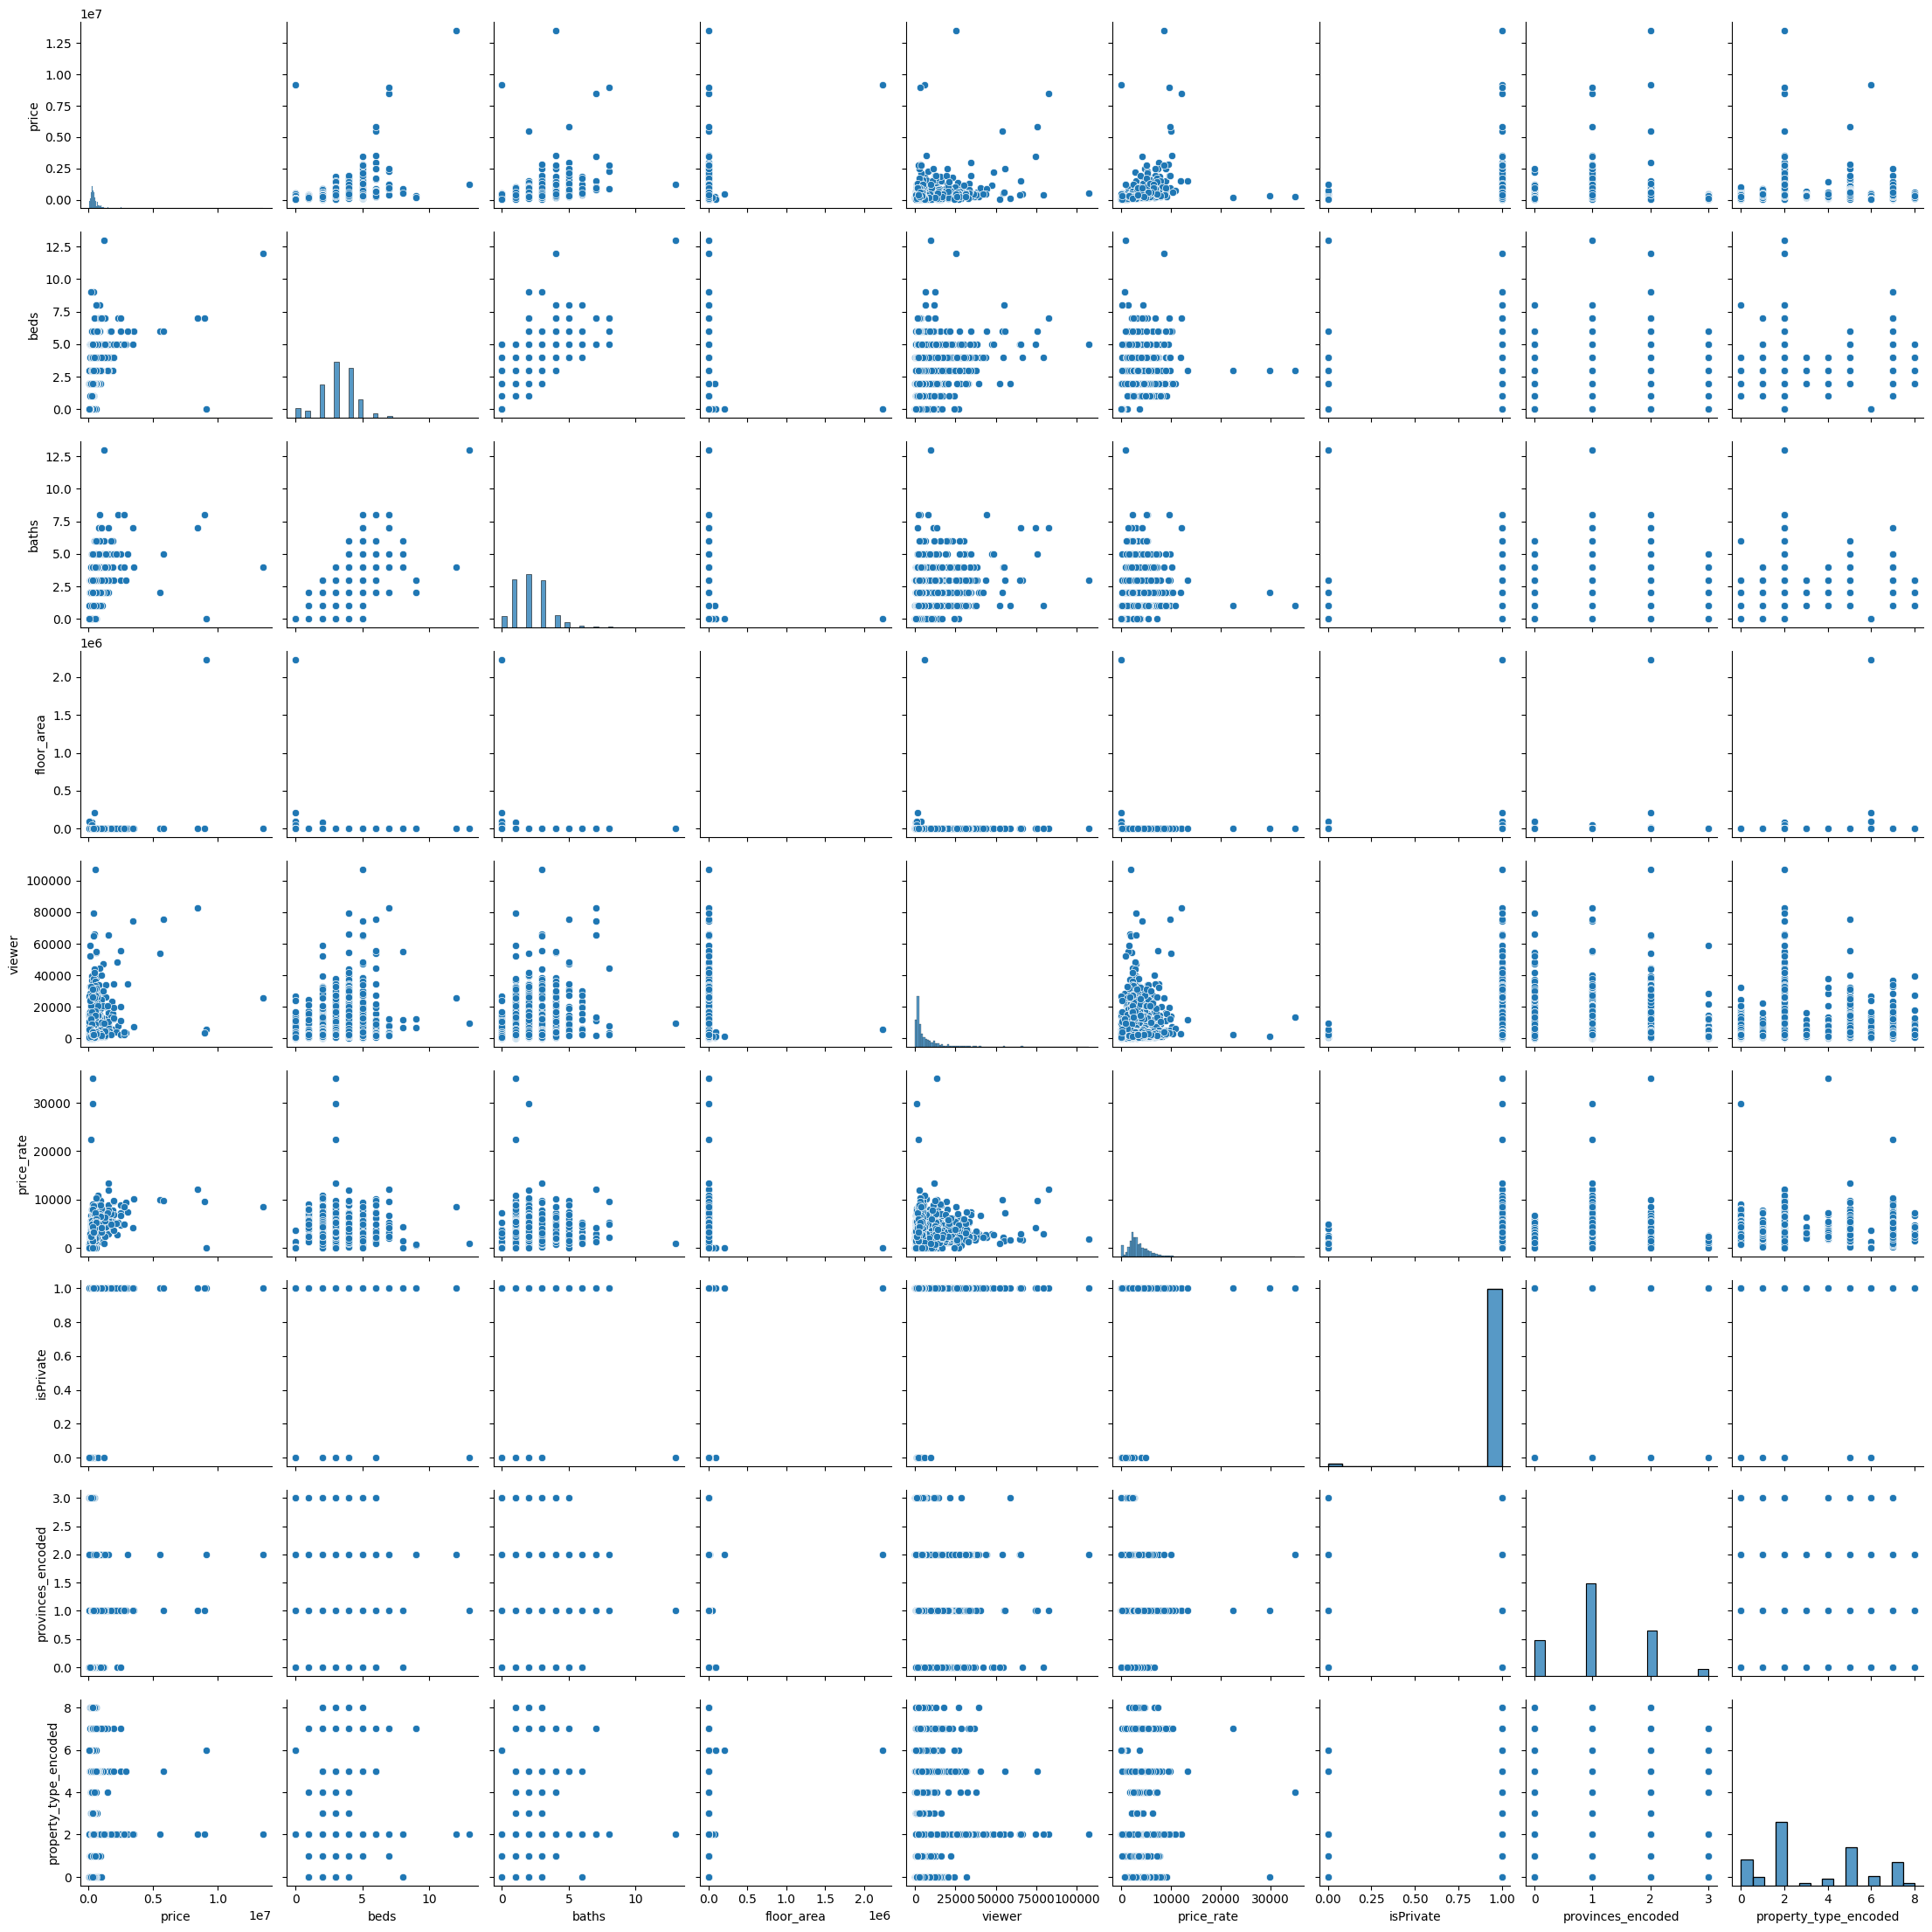

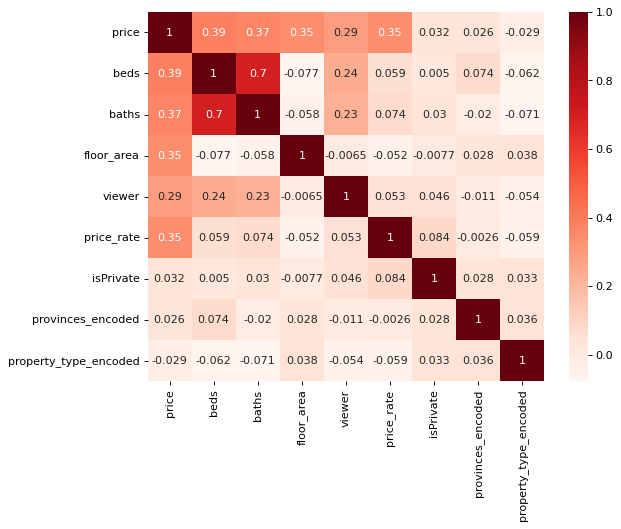

In [25]:

corrVals=data.corr()

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.pairplot(data)
plt.show()

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(data.corr(), annot=True, cmap = 'Reds')
plt.show()




beds, baths, floor area and viewer has the highest correlation to the price.

# 6 - Predictive Modeling

## Regression Modeling

Train - set split

In [11]:
y = data["price"]
x = data[["floor_area", "beds", "baths", "viewer","isPrivate","provinces_encoded","property_type_encoded"]]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.333, random_state=111)

x_train

,floor_area,beds,baths,viewer,isPrivate,provinces_encoded,property_type_encoded
1224,45.00000,1,1,637,1,1,0
1589,91.00000,3,2,1131,1,0,5
1,75.00000,2,2,6366,1,1,0
329,110.00000,3,1,37970,1,1,4
1891,2023.42800,0,0,772,1,1,6
...,...,...,...,...,...,...,...
1112,2185.30224,0,0,1465,1,1,6
1972,121.00000,4,2,5056,1,2,2
191,315.00000,3,2,7743,1,3,2
1201,137.00000,3,3,1253,1,1,5


In [13]:

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()
model7 = LinearRegression()

raw_sum_sq_errors = sum((y_train.mean() - y_train)**2)
raw_sum_sq_errors

print("Model 1")
model1.fit(x_train[['floor_area']], y_train)
#Show the model parameters
print(model1.coef_)
print(model1.intercept_)

Output = pd.DataFrame(model1.coef_, ['floor_area'], columns = ['Coeff'])
print(Output)

predictions_train = model1.predict(x_train[['floor_area']])

prediction_sum_sq_errors = sum((predictions_train - y_train)**2)

Rsquared1 = 1-prediction_sum_sq_errors/raw_sum_sq_errors
Rsquared1

N=len(y_train) #891 data rows
p=1 # one predictor used
Rsquared_adj1 = 1 - (1-Rsquared1)*(N-1)/(N-p-1)
print("Rsquared Regression Model with floor area: "+str(Rsquared1))
print("Rsquared Adjusted Regression Model with floor area: "+str(Rsquared_adj1))

print( "\n")
print("Model 2")
model2.fit(x_train[['floor_area', 'beds']], y_train)
#Show the model parameters
print(model2.coef_)
print(model2.intercept_)
#So Price = ??

#A nicer way to view the coefficients is by placing them in a DataFrame. This can be done with the following statement:
Output = pd.DataFrame(model2.coef_, ['floor_area', 'beds'], columns = ['Coeff'])
print(Output)

#Generate predictions for the train data
predictions_train = model2.predict(x_train[['floor_area', 'beds']])

#Raw sum of squares of errors is based on the mean of the y values without having any predictors to help.
raw_sum_sq_errors = sum((y_train.mean() - y_train)**2)

#Calculate sum of squares for prediction errors.
prediction_sum_sq_errors = sum((predictions_train - y_train)**2)

Rsquared2 = 1-prediction_sum_sq_errors/raw_sum_sq_errors
Rsquared2

N=891 #891 data rows
p=2 
Rsquared_adj2 = 1 - (1-Rsquared2)*(N-1)/(N-p-1)
print("Rsquared Regression Model with Floor Area & Beds: "+str(Rsquared2))
print("Rsquared Adjusted Regression Model with Floor Area & Beds: "+str(Rsquared_adj2))

print( "\n")
print("Model 3")
model3.fit(x_train[['floor_area','beds', 'baths']], y_train)
#Show the model parameters
print(model3.coef_)
print(model3.intercept_)
#So Price = ??

#A nicer way to view the coefficients is by placing them in a DataFrame. This can be done with the following statement:
Output = pd.DataFrame(model3.coef_, ['floor_area','beds', 'baths'], columns = ['Coeff'])
print(Output)

#Generate predictions for the train data
predictions_train = model3.predict(x_train[['floor_area','beds', 'baths']])

#Raw sum of squares of errors is based on the mean of the y values without having any predictors to help.
raw_sum_sq_errors = sum((y_train.mean() - y_train)**2)

#Calculate sum of squares for prediction errors.
prediction_sum_sq_errors = sum((predictions_train - y_train)**2)

Rsquared3 = 1-prediction_sum_sq_errors/raw_sum_sq_errors

N=891 
p=3 
Rsquared_adj3 = 1 - (1-Rsquared3)*(N-1)/(N-p-1)
print("Rsquared Regression Model with Floor Area , Beds and Baths: "+str(Rsquared3))
print("Rsquared Adjusted Regression Model with Floor Area , Beds and Baths: "+str(Rsquared_adj3))


#Model 4
print( "\n")
print("Model 4")
model4.fit(x_train[['floor_area','beds', 'baths','viewer']], y_train)
#Show the model parameters
print(model4.coef_)
print(model4.intercept_)
#So Price = ??

#A nicer way to view the coefficients is by placing them in a DataFrame. This can be done with the following statement:
Output = pd.DataFrame(model4.coef_, ['floor_area','beds', 'baths','viewer'], columns = ['Coeff'])
print(Output)

#Generate predictions for the training data
predictions_train = model4.predict(x_train[['floor_area','beds', 'baths','viewer']])

prediction_sum_sq_errors = sum((predictions_train - y_train)**2)

Rsquared4 = 1-prediction_sum_sq_errors/raw_sum_sq_errors

N=891
p=4 
Rsquared_adj4 = 1 - (1-Rsquared4)*(N-1)/(N-p-1)
print("Rsquared Regression Model with  Floor Area , Beds, Baths and viewer: "+str(Rsquared4))
print("Rsquared Adjusted Regression Model with  Floor Area , Beds, Baths and viewer: "+str(Rsquared_adj4))


#Model 5 
print( "\n")
print("Model 5")
model5.fit(x_train[['floor_area','beds', 'baths','viewer','isPrivate']], y_train)
#Show the model parameters
print(model5.coef_)
print(model5.intercept_)
#So Price = ??

#A nicer way to view the coefficients is by placing them in a DataFrame. This can be done with the following statement:
Output = pd.DataFrame(model5.coef_, ['floor_area','beds', 'baths','viewer','isPrivate'], columns = ['Coeff'])
print(Output)

#Generate predictions for the training data
predictions_train = model5.predict(x_train[['floor_area','beds', 'baths','viewer','isPrivate']])

prediction_sum_sq_errors = sum((predictions_train - y_train)**2)

Rsquared5 = 1-prediction_sum_sq_errors/raw_sum_sq_errors

N=891
p=5 
Rsquared_adj5 = 1 - (1-Rsquared5)*(N-1)/(N-p-1)
print("Rsquared Regression Model with  Floor Area , Beds, Baths , viewer and number of private selling method: "+str(Rsquared5))
print("Rsquared Adjusted Regression Model with Floor Area , Beds, Baths , viewer and number of private selling method: "+str(Rsquared_adj5))


#Model 6 
print( "\n")
print("Model 6")
model6.fit(x_train[['floor_area','beds', 'baths','viewer','isPrivate','provinces_encoded']], y_train)
#Show the model parameters
print(model6.coef_)
print(model6.intercept_)
#So Price = ??

#A nicer way to view the coefficients is by placing them in a DataFrame. This can be done with the following statement:
Output = pd.DataFrame(model6.coef_, ['floor_area','beds', 'baths','viewer','isPrivate','provinces_encoded'], columns = ['Coeff'])
print(Output)

#Generate predictions for the training data
predictions_train = model6.predict(x_train[['floor_area','beds', 'baths','viewer','isPrivate','provinces_encoded']])

prediction_sum_sq_errors = sum((predictions_train - y_train)**2)

Rsquared6 = 1-prediction_sum_sq_errors/raw_sum_sq_errors

N=891
p=6 
Rsquared_adj6 = 1 - (1-Rsquared6)*(N-1)/(N-p-1)
print("Rsquared Regression Model with  Floor Area , Beds, Baths , viewer , number of private selling method and provinces_encoded: "+str(Rsquared6))
print("Rsquared Adjusted Regression Model with Floor Area , Beds, Baths , viewer , number of private selling method and provinces_encoded: "+str(Rsquared_adj6))

#Model 7 
print( "\n")
print("Model 7")
model7.fit(x_train[['floor_area','beds', 'baths','viewer','isPrivate','provinces_encoded','property_type_encoded']], y_train)
#Show the model parameters
print(model7.coef_)
print(model7.intercept_)
#So Price = ??

#A nicer way to view the coefficients is by placing them in a DataFrame. This can be done with the following statement:
Output = pd.DataFrame(model7.coef_, ['floor_area','beds', 'baths','viewer','isPrivate','provinces_encoded','property_type_encoded'], columns = ['Coeff'])
print(Output)

#Generate predictions for the training data
predictions_train = model7.predict(x_train[['floor_area','beds', 'baths','viewer','isPrivate','provinces_encoded','property_type_encoded']])

prediction_sum_sq_errors = sum((predictions_train - y_train)**2)

Rsquared7 = 1-prediction_sum_sq_errors/raw_sum_sq_errors

N=891
p=7 
Rsquared_adj7 = 1 - (1-Rsquared7)*(N-1)/(N-p-1)
print("Rsquared Regression Model with  Floor Area , Beds, Baths , viewer , number of private selling method , provinces_encoded and property_type_encoded: "+str(Rsquared7))
print("Rsquared Adjusted Regression Model with Floor Area , Beds, Baths , viewer , number of private selling method , provinces_encoded and property_type_encoded: "+str(Rsquared_adj7))



Model 1
[3.8226591]
461387.2388633014
               Coeff
floor_area  3.822659
Rsquared Regression Model with floor area: 0.1359506526510711
Rsquared Adjusted Regression Model with floor area: 0.13497871862705657


Model 2
[4.20904112e+00 2.21218249e+05]
-236582.43699320388
                    Coeff
floor_area       4.209041
beds        221218.249059
Rsquared Regression Model with Floor Area & Beds: 0.3146470555902292
Rsquared Adjusted Regression Model with Floor Area & Beds: 0.3131034678775946


Model 3
[4.21168136e+00 1.58421556e+05 9.44007792e+04]
-241508.41509163933
                    Coeff
floor_area       4.211681
beds        158421.556281
baths        94400.779193
Rsquared Regression Model with Floor Area , Beds and Baths: 0.3278051805090283
Rsquared Adjusted Regression Model with Floor Area , Beds and Baths: 0.3255316918298029


Model 4
[4.17600670e+00 1.40958810e+05 7.57773068e+04 1.61799323e+01]
-260681.31586842408
                    Coeff
floor_area       4.176007
beds   

0.3722 model7 has the highest Rsquared Regression model values. 

MAE: 249420.79963691914
MAPE: 0.8166069029400136
RMSE: 375916.12848562846
<bound method LinearModel.predict of LinearRegression()>


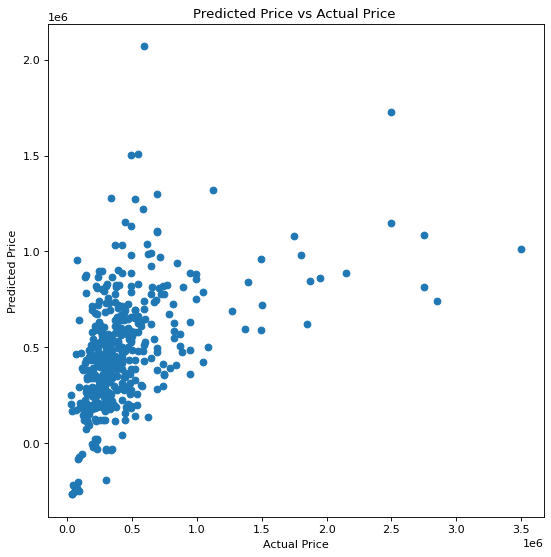

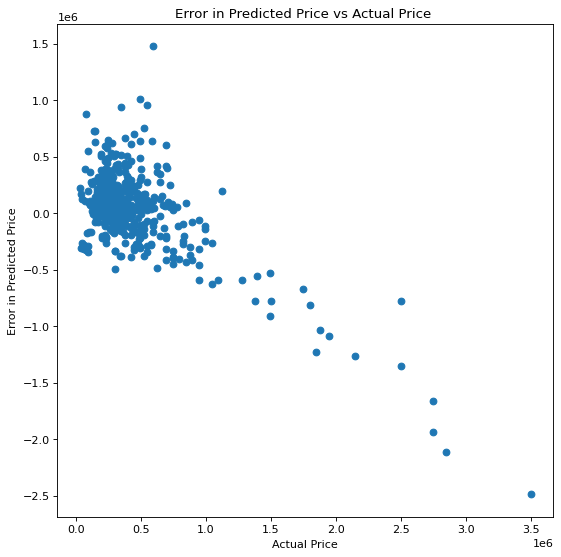

In [23]:

predictions_test = model7.predict(x_test[['floor_area','beds', 'baths','viewer','isPrivate','provinces_encoded','property_type_encoded']])

Prediction_test_MAE = sum(abs(predictions_test - y_test))/len(y_test)
Prediction_test_MAPE = sum(abs(predictions_test - y_test)/y_test)/len(y_test)
Prediction_test_RMSE = (sum((predictions_test - y_test)**2)/len(y_test))**0.5

print("MAE: " +str(Prediction_test_MAE))
print("MAPE: "+ str(Prediction_test_MAPE))
print("RMSE: "+str(Prediction_test_RMSE))
print(model7.predict)

###Plot prediction results
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, predictions_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Price vs Actual Price ")
plt.show() #Should be close to a straight line

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Error in Predicted Price vs Actual Price ")
plt.xlabel("Actual Price")
plt.ylabel("Error in Predicted Price")
plt.scatter(y_test, predictions_test - y_test)
plt.show()



Having a close to a linear line within both of the graph. This is the result of graph predicted using model7 which has the highest value but only having 0.3722.

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
predictions = rf_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 103872885582.5255


By using random forest regressor to predict. The result stated that the model not reliable as it has a high mean squared error which indicates that there area a lot of wrong prediction. As shown above value it is a high number. 

# 7 - Key Findings


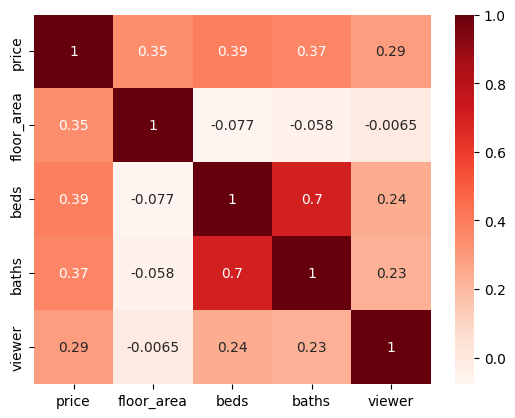

Concolusion for key findings for answering the question is the accuracy for predicting the property price is not accurate enough due to the correlation value is not that high. 

Moreover the key vairable that will affect the pricing is beds as it has the highest correlation value with price. Other than beds, number of baths and floor area are also a key vairable that significantly affect the price of a property too.


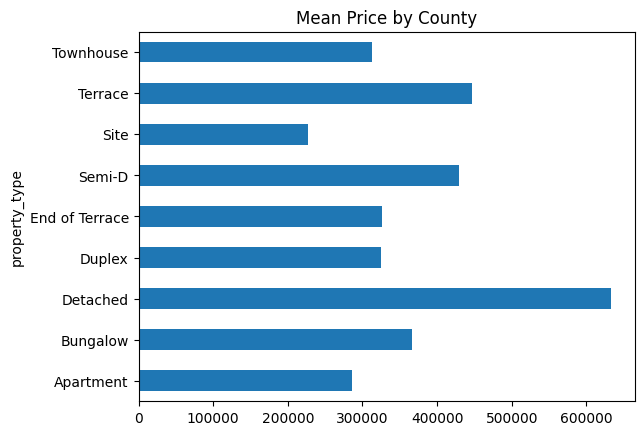

Lastly The property type will also affect the price as different property type the price will also be different.





The prediction modeling which using the linear regression that has the most reliable is model 7 as it has the Rsquared regression value of 0.3722. However, this is not accurate enough to predict the predict the price of property as the value is too low and have too high error comparing using the split set of train and tested set. One of the reason that the predicting modelling is not accurate is because the value that were mined and selected have a very low value of correlation. Another reason could be the number of data is not enough. The limitation of using linear regression is it may be bias as it assumes there will be a linear relationship between independent variables and dependent variables. 

- Rsquared Regression Model with  Floor Area , Beds, Baths , viewer , number of private selling method , provinces_encoded and property_type_encoded: 0.37224489964921226
